## Install libraries

Currently you have to first install the `unilm` package, and then the `transformers` package (which updates the outdated `transformers` package that is included in the `unilm` package). The reason we also install the `unilm` package is because we need its preprocessing files. I've forked it, and removed some statements which introduced some issues.

In [2]:
!rm -rf unilm
!git clone -b remove_torch_save https://github.com/NielsRogge/unilm.git

Cloning into 'unilm'...
remote: Enumerating objects: 7582, done.
remote: Total 7582 (delta 0), reused 0 (delta 0), pack-reused 7582
Receiving objects: 100% (7582/7582), 17.61 MiB | 22.57 MiB/s, done.
Resolving deltas: 100% (3266/3266), done.


Replace this code with the code in setup.py file in umilim/layoutlm. Then install the libraries.

In [ ]:
# install_requires=[
#     'transformers==4.28.1',
#     'tensorboardX==2.0',
#     'lxml==4.9.1',
#     'seqeval==0.0.12',
#     'Pillow==8.3.*',
# ]

In [3]:
! cd unilm/layoutlm
! pip install unilm/layoutlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./unilm/layoutlm
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.7/195.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 80.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.4 MB/s eta 0:00:00
  Created wheel for layoutlm: filename=layoutlm-0.0-py3-none-any.whl size=11485 sha256=8c35ac8ed7b452798e5fd7bd9b33a8e4a85459d4db8e179bd3a6b602242df05e
  Stored in directory: /tmp/pip-ephem-wheel-cache-0vg580bl/wheels/3c/7f/a8/5de48174bd01f607f39c01b19892dfa97433524b4acbc38148
  Created wheel for seqeval: filena

In [4]:
!pip install pillow==8.3.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! rm -r transformers
! git clone https://github.com/huggingface/transformers.git
! cd transformers
! pip install ./transformers

rm: cannot remove 'transformers': No such file or directory
Cloning into 'transformers'...
remote: Enumerating objects: 137377, done.
remote: Counting objects: 100% (1124/1124), done.
remote: Compressing objects: 100% (564/564), done.
remote: Total 137377 (delta 680), reused 823 (delta 482), pack-reused 136253
Receiving objects: 100% (137377/137377), 136.93 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (102881/102881), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6990209 sha256=24e9b58b042cba46484fe9721e3408c46be4a9ce013e1d99c20bafcbdbd08b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-uixr6yte/wheels/1c/6e/db/b90d9f8554f165a9beb90b593fde94e9e60919270aed78efa0
Successfully 

In [6]:
!pip install transformers==4.28.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.0.dev0
    Uninstalling transformers-4.29.0.dev0:
      Successfully uninstalled transformers-4.29.0.dev0


## Getting the data

Load the dataset. This results in a directory called "dataset" being created, which has 2 subdirectories, one for training and one for testing. Each of those has 2 subdirectories in turn, one containing the images as png files and one containing the annotations in json format.

Let's take a look at a training example. For this, we are going to use PIL (Python Image Library).

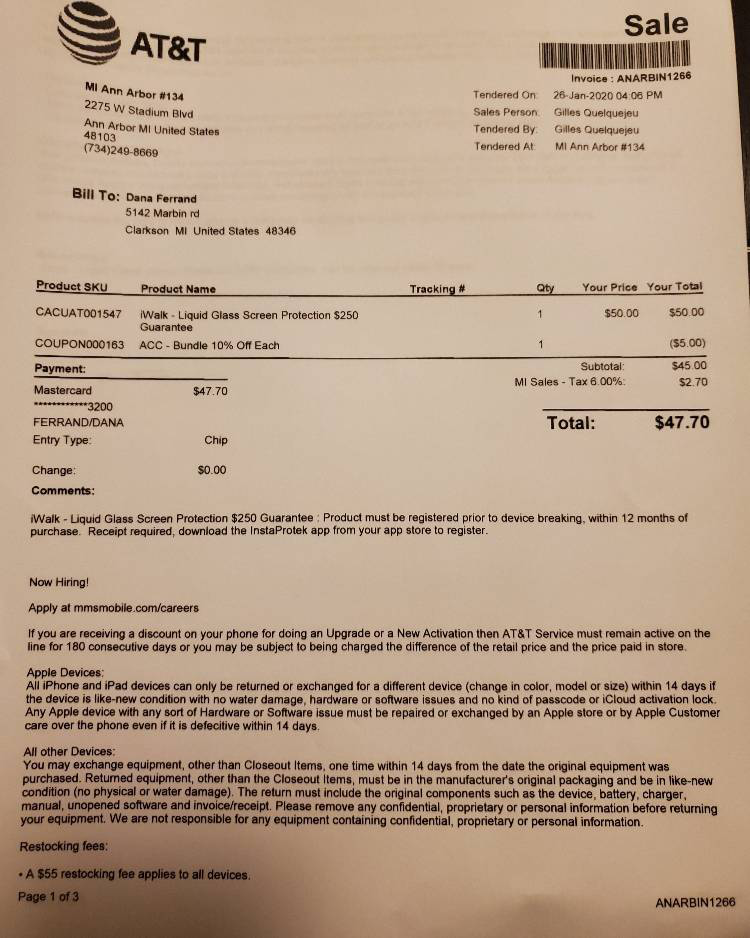

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/drive/MyDrive/Train/images/A15.png")
image = image.convert("RGB")
image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now let's plot its corresponding annotations. Basically, if you type `data['form']`, you get a list of all general annotations. Each general annotation has a label, a bounding box, and one or more words, which in also have their own bounding box. The bounding boxes are in [xleft, ytop, xright, ybottom] format.
 

In [ ]:
import json

with open('/content/drive/MyDrive/Train/annotations/A15.json') as f:
  data = json.load(f)

for annotation in data['form']:
  print(annotation)

{'box': [130, 33, 204, 64], 'text': 'AT&T', 'label': 'STORE NAME', 'words': [{'box': [130, 33, 204, 64], 'text': 'AT&T'}], 'linking': [], 'id': 0}
{'box': [569, 73, 690, 84], 'text': 'Invoice : ANARBIN1266', 'label': 'RECEIPT NUMBER', 'words': [{'box': [569, 73, 606, 84], 'text': 'Invoice'}, {'box': [608, 73, 613, 83], 'text': ':'}, {'box': [615, 73, 690, 83], 'text': 'ANARBIN1266'}], 'linking': [], 'id': 1}
{'box': [83, 101, 194, 121], 'text': '2275 W Stadium Blvd', 'label': 'STORE BRANCH', 'words': [{'box': [83, 101, 109, 113], 'text': '2275'}, {'box': [111, 102, 118, 114], 'text': 'W'}, {'box': [127, 107, 166, 118], 'text': 'Stadium'}, {'box': [171, 109, 194, 121], 'text': 'Blvd'}], 'linking': [], 'id': 2}
{'box': [553, 89, 612, 101], 'text': '26-Jan-2020', 'label': 'DATE', 'words': [{'box': [553, 89, 612, 101], 'text': '26-Jan-2020'}], 'linking': [], 'id': 3}
{'box': [83, 119, 220, 142], 'text': 'Ann Arbor MI United States\n48103', 'label': 'STORE BRANCH', 'words': [{'box': [83, 11

The PIL library has a handy ImageDraw module, which -you guessed it- allows to draw things (such as rectangles) on an image:

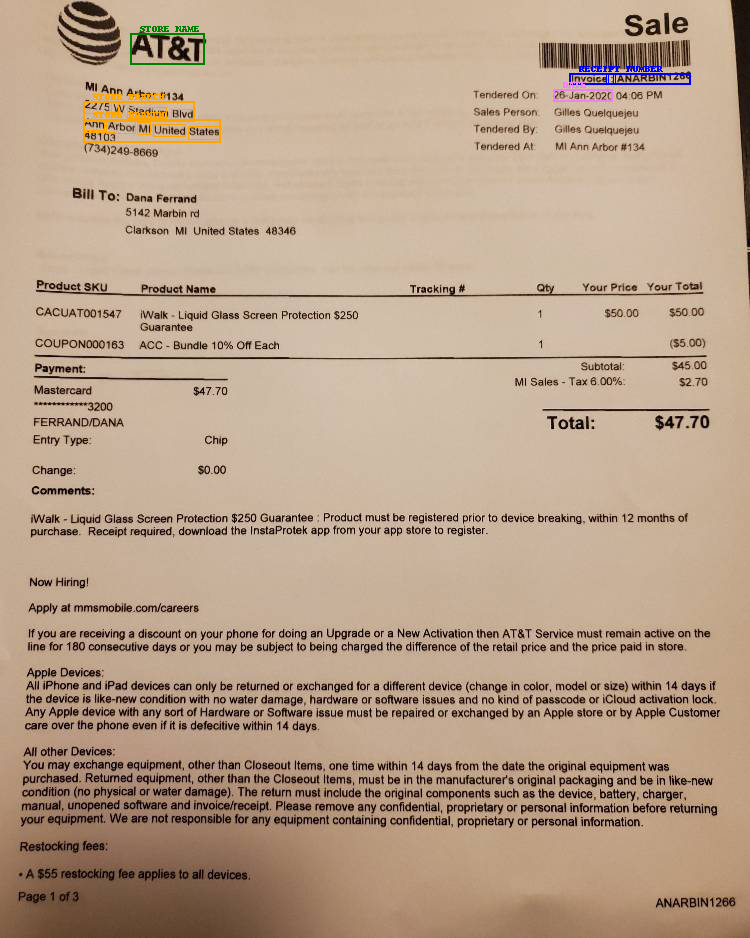

In [ ]:
draw = ImageDraw.Draw(image, "RGBA")

font = ImageFont.load_default()

label2color = {'question':'brown', 'answer':'purple', 'header':'pink', 'other':'yellow','RECEIPT NUMBER':'blue', 'STORE NAME':'green', 'STORE BRANCH':'orange', 'DATE':'violet'}

for annotation in data['form']:
  label = annotation['label']
  general_box = annotation['box']
  draw.rectangle(general_box, outline=label2color[label], width=2)
  draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
  words = annotation['words']
  for word in words:
    box = word['box']
    draw.rectangle(box, outline=label2color[label], width=1)

image

## Preprocessing the data

Next, we need to turn the document images into individual tokens and corresponding labels (BIOES format, see further). We do this both for the training and test datasets. Make sure to run this from the `/content` directory:

In [ ]:
! python unilm/layoutlm/examples/seq_labeling/preprocess.py --data_dir /content/drive/MyDrive/Train/annotations \
                                                      --data_split train \
                                                      --output_dir /content/drive/MyDrive/OCR \
                                                      --model_name_or_path microsoft/layoutlm-base-uncased \
                                                      --max_len 510

! python unilm/layoutlm/examples/seq_labeling/preprocess.py --data_dir /content/drive/MyDrive/Test/annotations \
                                                      --data_split test \
                                                      --output_dir /content/drive/MyDrive/OCR \
                                                      --model_name_or_path microsoft/layoutlm-base-uncased \
                                                      --max_len 510

Next, we create a labels.txt file that contains the unique labels of the FUNSD dataset:

In [ ]:
! cat /content/drive/MyDrive/OCR/train.txt | cut -d$'\t' -f 2 | grep -v "^$"| sort | uniq > /content/drive/MyDrive/OCR/labels.txt

## Define a PyTorch dataset

First, we create a list containing the unique labels based on `data/labels.txt` (run this from the content directory):

In [7]:
from torch.nn import CrossEntropyLoss

def get_labels(path):
    with open(path, "r") as f:
        labels = f.read().splitlines()
    if "O" not in labels:
        labels = ["O"] + labels
    if "S-RECEIPT NUMBER" not in labels:
        labels = ["S=RECEIPT NUMBER"] + labels
    return labels

labels = get_labels("/content/drive/MyDrive/OCR/labels.txt")
num_labels = len(labels)
label_map = {i: label for i, label in enumerate(labels)}
# Use cross entropy ignore index as padding label id so that only real label ids contribute to the loss later
pad_token_label_id = CrossEntropyLoss().ignore_index

We can see that the dataset uses the so-called BIOES annotation scheme to annotate the tokens. This means that a given token can be either at the beginning (B), inside (I), outside (O), at the end (E) or start (S) of a given entity. Entities include ANSWER, QUESTION, HEADER and OTHER: 

In [ ]:
print(num_labels)

14


Next, we can create a PyTorch dataset and corresponding dataloader (both for training and evaluation):

In [ ]:
labels = ["O", "B-DATE", "I-DATE", "E-DATE", "B-RECEIPT NUMBER", "I-RECEIPT NUMBER", "E-RECEIPT NUMBER", "B-STORE BRANCH", "I-STORE BRANCH", "E-STORE BRANCH", "B-STORE NAME", "I-STORE NAME", "E-STORE NAME", "S-RECEIPT NUMBER", "S-DATE", "S-STORE BRANCH", "S-STORE NAME"]


In [ ]:
from transformers import LayoutLMTokenizer
from layoutlm.data.funsd import FunsdDataset, InputFeatures
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

args = {'local_rank': -1,
        'overwrite_cache': True,
        'data_dir': '/content/drive/MyDrive/OCR',
        'model_name_or_path':'microsoft/layoutlm-base-uncased',
        'max_seq_length': 512,
        'model_type': 'layoutlm',}

# class to turn the keys of a dict into attributes (thanks Stackoverflow)
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

args = AttrDict(args)

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

# the LayoutLM authors already defined a specific FunsdDataset, so we are going to use this here
train_dataset = FunsdDataset(args, tokenizer, labels, pad_token_label_id, mode="train")
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset,
                              sampler=train_sampler,
                              batch_size=2)

eval_dataset = FunsdDataset(args, tokenizer, labels, pad_token_label_id, mode="test")
eval_sampler = SequentialSampler(eval_dataset)
eval_dataloader = DataLoader(eval_dataset,
                             sampler=eval_sampler,
                            batch_size=2)

In [ ]:
len(train_dataloader)

36

In [ ]:
len(eval_dataloader)

9

In [ ]:
batch = next(iter(train_dataloader))
input_ids = batch[0][0]
tokenizer.decode(input_ids)

'[CLS] victra invoice : nc044in36823 1314 e memorial dr suite b 31 - dec - 2020 ahoskie nc united states 27910 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

## Define and fine-tune the model

As this is a sequence labeling task, we are going to load `LayoutLMForTokenClassification` (the base sized model) from the hub. We are going to fine-tune it on a downstream task, namely FUNSD.

In [ ]:
from transformers import LayoutLMForTokenClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForTokenClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased",
    num_labels=num_labels
)

model

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

LayoutLMForTokenClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
 

Now we can start training:

In [ ]:
from transformers import AdamW
from tqdm import tqdm

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 20
t_total = len(train_dataloader) * num_train_epochs

model.train()
for epoch in range(num_train_epochs):
    for batch in tqdm(train_dataloader, desc="Training"):
        input_ids = batch[0]
        bbox = batch[4]
        attention_mask = batch[1]
        token_type_ids = batch[2]
        labels = batch[3]

        try:
            outputs = model(
                input_ids=input_ids,
                bbox=bbox,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels,
            )
            loss = outputs.loss
        except IndexError as e:
            print(f"Error: {e}")
            continue

        if global_step % 100 == 0:
            print(f"Loss after {global_step} steps: {loss.item()}")

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        global_step += 1

Training:   3%|▎         | 1/36 [00:04<02:46,  4.75s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:09<02:49,  4.99s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:14<02:33,  4.65s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:17<02:11,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:20<01:56,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:24<01:51,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:29<02:04,  4.28s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:33<01:56,  4.16s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:36<01:45,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:40<01:36,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:44<01:37,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:49<01:40,  4.21s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:52<01:32,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:56<01:23,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [01:00<01:20,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:05<01:27,  4.39s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:10<01:22,  4.34s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:13<01:11,  3.98s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:16<01:03,  3.76s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:19<00:58,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:24<01:01,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:28<00:56,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:32<00:49,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:35<00:43,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:39<00:41,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:44<00:41,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:48<00:36,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:51<00:30,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:54<00:25,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:58<00:22,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [02:03<00:20,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:07<00:15,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:10<00:11,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:13<00:07,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:19<00:04,  4.22s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:21<00:00,  3.94s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:26,  4.19s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:02,  3.60s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:10<01:52,  3.41s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:03,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:20<02:11,  4.23s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<01:57,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:46,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:38,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:46,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:39<01:49,  4.20s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:36,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:29,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:49<01:22,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:54<01:28,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:58<01:26,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:16,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:08,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:08<01:03,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:13<01:08,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:17<01:05,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:20<00:57,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:50,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:27<00:47,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:32<00:48,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:36<00:44,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:37,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:43<00:32,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:29,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:52<00:28,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:55<00:24,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:59<00:18,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:02<00:14,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:11,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:11<00:08,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:14<00:03,  3.94s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:16<00:00,  3.79s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:51,  3.19s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:53,  3.34s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:11<02:17,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:16<02:13,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:59,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:50,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:52,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:58,  4.24s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:35<01:50,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:39,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:31,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:46<01:34,  3.95s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:51<01:38,  4.27s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:55<01:29,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:58<01:20,  3.81s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:13,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:07<01:19,  4.19s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:12<01:19,  4.41s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:15<01:08,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:18<01:01,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:22<00:55,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:27<00:58,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:31<00:54,  4.22s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:35<00:47,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:38<00:41,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:42<00:38,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:47<00:37,  4.21s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:51<00:33,  4.16s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:54<00:27,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:58<00:22,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [02:02<00:19,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:07<00:17,  4.28s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:11<00:12,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:14<00:07,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:17<00:03,  3.65s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:19<00:00,  3.89s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:05<03:02,  5.23s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:09<02:33,  4.50s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:10,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<01:58,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:20<02:03,  3.97s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:25<02:09,  4.32s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:28<01:57,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:32<01:47,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:35<01:39,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:40<01:45,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:45<01:47,  4.31s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:48<01:36,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:51<01:26,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:55<01:19,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [01:00<01:25,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:04<01:24,  4.21s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:08<01:14,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:11<01:06,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:14<01:02,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:20<01:06,  4.15s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:24<01:02,  4.15s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:27<00:53,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:30<00:47,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:34<00:43,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:39<00:44,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:43<00:40,  4.03s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:46<00:34,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:49<00:28,  3.61s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:53<00:26,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:58<00:24,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [02:02<00:19,  3.98s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:05<00:14,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:08<00:10,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:12<00:07,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:17<00:04,  4.13s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:19<00:00,  3.88s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:50,  3.15s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:46,  3.13s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:09<01:46,  3.24s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<02:05,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<02:04,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:21<01:51,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:25<01:42,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:28<01:40,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:33<01:48,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:43,  3.98s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:40<01:33,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:43<01:25,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:47<01:24,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:52<01:28,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:23,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [00:59<01:14,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:02<01:07,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:06<01:06,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:11<01:08,  4.03s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<01:02,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:18<00:55,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:21<00:49,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:49,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:49,  4.15s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:43,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:37<00:37,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:40<00:31,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:30,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:28,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:23,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:56<00:18,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [01:59<00:14,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:04<00:11,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:08<00:08,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.77s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:13<00:00,  3.71s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:51,  3.19s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:05,  3.70s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:19,  4.24s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:08,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<01:54,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:45,  3.51s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:49,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:54,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:45,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:36,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:28,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:31,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:34,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:24,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:16,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [00:59<01:09,  3.47s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:12,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:13,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:04,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<00:58,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:18<00:52,  3.50s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:54,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:53,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:45,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:39,  3.61s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:37<00:34,  3.48s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:34,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:46<00:32,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:26,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:21,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:56<00:17,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:01<00:15,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:05<00:12,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:08<00:07,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.63s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:13<00:00,  3.72s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:43,  4.68s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:09<02:40,  4.73s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:12,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<01:56,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<01:47,  3.48s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<01:58,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:28<02:01,  4.20s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:49,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:40,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:32,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:43<01:40,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:47<01:40,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:51<01:29,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:54<01:20,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:16,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:02<01:21,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:07<01:18,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:10<01:09,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:13<01:01,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:17<00:57,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:21<01:00,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:25<00:56,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:29<00:49,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:32<00:43,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:36<00:40,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:41<00:40,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:45<00:35,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:48<00:30,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:51<00:25,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:55<00:22,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [02:00<00:20,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:04<00:16,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:07<00:11,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:10<00:07,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:15<00:03,  3.80s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:17<00:00,  3.82s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:29,  4.27s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:04,  3.66s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:10<01:53,  3.44s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<01:54,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<02:04,  4.03s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<02:00,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:48,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:39,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:33<01:39,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:45,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:40,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:31,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:23,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:23,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:26,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:18,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:10,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:07<01:04,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:05,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:17<01:05,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:20<00:57,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:50,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:45,  3.50s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:46,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:36<00:45,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:38,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:33,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:28,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:27,  3.99s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:55<00:25,  4.17s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:58<00:19,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:01<00:14,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:05<00:10,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:10<00:08,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:14<00:04,  4.16s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:16<00:00,  3.79s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:53,  3.25s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:50,  3.24s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:11<02:07,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:16,  4.27s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<02:00,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:49,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:25<01:42,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:30<01:51,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:35<01:52,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:41,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:31,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:44<01:24,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:49<01:31,  3.97s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:54<01:29,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:20,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:12,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:07,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:12,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:13<01:09,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<01:01,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:19<00:54,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:52,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:53,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:32<00:48,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:41,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:36,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:43<00:33,  3.76s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:48<00:32,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:51<00:27,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:22,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:57<00:17,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:02<00:14,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:07<00:12,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:10<00:07,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:03,  3.69s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:15<00:00,  3.76s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<02:00,  3.43s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:08<02:28,  4.37s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:22,  4.32s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:04,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:52,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:48,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:27<01:56,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:52,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:41,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:32,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:29,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:46<01:35,  3.97s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:30,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:21,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:14,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:14,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:05<01:17,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:10,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:03,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<00:57,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:20<00:57,  3.81s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:24<00:57,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:50,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:44,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:38,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:38,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:44<00:37,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:30,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:25,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:20,  3.50s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:58<00:19,  3.88s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:03<00:16,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:11,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.53s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:15<00:00,  3.76s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:49,  4.84s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:08<02:19,  4.09s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:11<02:00,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<01:50,  3.44s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:58,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:24<02:06,  4.22s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:27<01:56,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:30<01:44,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:35,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:40,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:43<01:44,  4.16s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:46<01:33,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:49<01:24,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:17,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:22,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:02<01:23,  4.16s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:05<01:13,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:08<01:05,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<00:59,  3.51s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:17<01:03,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:21<01:01,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:24<00:53,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:47,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:42,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:36<00:43,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:40<00:40,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:43<00:34,  3.81s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:28,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:25,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:55<00:24,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:59<00:20,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:03<00:15,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:11,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:10<00:07,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:15<00:04,  4.08s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:17<00:00,  3.82s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:52,  3.20s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:48,  3.18s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:09<01:45,  3.21s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<02:05,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<02:05,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:52,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:25<01:43,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:28<01:37,  3.49s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:33<01:47,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:44,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:34,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:44<01:26,  3.61s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:24,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:52<01:29,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:24,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:15,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:03<01:08,  3.61s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:07<01:07,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:09,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<01:02,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:18<00:55,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:22<00:49,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:48,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:48,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:43,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:37<00:37,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:41<00:32,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:30,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:28,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:23,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:56<00:18,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:00<00:14,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:04<00:11,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:08,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.84s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:14<00:00,  3.73s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:49,  3.13s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<02:00,  3.54s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:11<02:18,  4.21s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:11,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:57,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:47,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:49,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:55,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:46,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:36,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:28,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:29,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:34,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:26,  3.95s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:17,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:10,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:11,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:13,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:06,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<00:59,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:19<00:53,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:53,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:53,  4.15s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:46,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:40,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:38<00:35,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:34,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:33,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:27,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:21,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:57<00:17,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:02<00:15,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:12,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.63s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:14<00:00,  3.74s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:28,  4.25s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:09<02:35,  4.57s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:16,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:00,  3.76s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:50,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<01:55,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:28<02:01,  4.18s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:49,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:39,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:31,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:37,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:47<01:38,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:28,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:19,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:13,  3.49s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:18,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:06<01:18,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:08,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:02,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<00:56,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:21<00:59,  3.99s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:25<00:57,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:49,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:43,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:39,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:40<00:39,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:44<00:36,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:29,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:25,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:21,  3.57s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:59<00:19,  3.99s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:03<00:16,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:11,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:03,  3.71s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:16<00:00,  3.78s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:40,  4.59s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:08,  3.77s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:10<01:54,  3.47s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<01:47,  3.35s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<02:01,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<02:02,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:49,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:40,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:32<01:32,  3.42s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:41,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:41,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:31,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:23,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:52<01:18,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:24,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:21,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:11,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:07<01:04,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:11<01:02,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<01:04,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:20<01:00,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:52,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:46,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:30<00:44,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:44,  4.03s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:39,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:33,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:28,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:49<00:26,  3.76s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:24,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:58<00:19,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:01<00:14,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:04<00:10,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:08<00:07,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:04,  4.08s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:15<00:00,  3.76s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:52,  3.21s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:49,  3.22s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:09<01:51,  3.37s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<02:07,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<02:04,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:51,  3.72s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:25<01:42,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:41,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:49,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:44,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:34,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:44<01:26,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:25,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:29,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:22,  3.95s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:14,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:03<01:08,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:07<01:08,  3.82s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:09,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<01:02,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:19<00:54,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:22<00:48,  3.50s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:48,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:49,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:42,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:38<00:36,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:41<00:31,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:30,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:29,  4.15s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:23,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:57<00:18,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:00<00:14,  3.51s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:05<00:11,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:08,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.82s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:14<00:00,  3.74s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:49,  3.12s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:04,  3.66s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:20,  4.25s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:07,  3.99s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<01:54,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:46,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:49,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:55,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:45,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:35,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:28,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:31,  3.81s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:34,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:24,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:16,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [00:59<01:10,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:13,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:14,  4.11s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:05,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:15<00:58,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:18<00:52,  3.50s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:55,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:53,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:46,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:39,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:37<00:34,  3.49s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:35,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:32,  4.07s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:26,  3.81s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:53<00:21,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:56<00:17,  3.54s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:01<00:15,  3.97s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:12,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:12<00:03,  3.61s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:14<00:00,  3.73s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:39,  4.55s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:09<02:41,  4.76s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:12<02:14,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:00,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<01:50,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<01:58,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:28<02:00,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:31<01:47,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:37,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:30,  3.48s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:43<01:39,  3.97s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:47<01:39,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:50<01:28,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:19,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:56<01:13,  3.49s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:18,  3.93s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:06<01:16,  4.05s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:09<01:08,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:01,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<00:57,  3.62s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:21<01:00,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:25<00:56,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:28<00:49,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:43,  3.63s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:40,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:40<00:40,  4.06s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:44<00:36,  4.01s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:47<00:29,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:24,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:21,  3.65s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:59<00:19,  4.00s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:03<00:15,  3.90s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:06<00:11,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:03,  3.70s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:16<00:00,  3.78s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:04<02:36,  4.48s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:07<02:06,  3.72s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:10<01:54,  3.48s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:14<01:49,  3.41s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:19<02:03,  3.98s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:23<02:02,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:26<01:49,  3.79s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:40,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:33<01:35,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:38<01:43,  3.98s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:42<01:39,  3.99s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:45<01:29,  3.74s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:21,  3.56s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:52<01:19,  3.61s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:24,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:01<01:20,  4.02s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:04<01:11,  3.78s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:07<01:04,  3.60s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:11<01:03,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<01:05,  4.08s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:20<00:59,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:23<00:52,  3.75s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:26<00:46,  3.59s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:46,  3.83s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:35<00:45,  4.12s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:39<00:39,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:42<00:33,  3.68s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:45<00:28,  3.53s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:26,  3.77s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:24,  4.09s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:58<00:19,  3.89s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:01<00:14,  3.67s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:04<00:10,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:09<00:07,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:04,  4.11s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:15<00:00,  3.77s/it]


Error: Target 16 is out of bounds.


Training:   3%|▎         | 1/36 [00:03<01:50,  3.15s/it]

Error: Target 16 is out of bounds.


Training:   6%|▌         | 2/36 [00:06<01:48,  3.20s/it]

Error: Target 16 is out of bounds.


Training:   8%|▊         | 3/36 [00:10<01:56,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  11%|█         | 4/36 [00:15<02:11,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  14%|█▍        | 5/36 [00:18<02:02,  3.96s/it]

Error: Target 16 is out of bounds.


Training:  17%|█▋        | 6/36 [00:22<01:50,  3.69s/it]

Error: Target 16 is out of bounds.


Training:  19%|█▉        | 7/36 [00:25<01:41,  3.52s/it]

Error: Target 16 is out of bounds.


Training:  22%|██▏       | 8/36 [00:29<01:44,  3.73s/it]

Error: Target 16 is out of bounds.


Training:  25%|██▌       | 9/36 [00:34<01:50,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  28%|██▊       | 10/36 [00:37<01:41,  3.92s/it]

Error: Target 16 is out of bounds.


Training:  31%|███       | 11/36 [00:41<01:32,  3.70s/it]

Error: Target 16 is out of bounds.


Training:  33%|███▎      | 12/36 [00:44<01:25,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  36%|███▌      | 13/36 [00:48<01:27,  3.80s/it]

Error: Target 16 is out of bounds.


Training:  39%|███▉      | 14/36 [00:53<01:30,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  42%|████▏     | 15/36 [00:57<01:22,  3.91s/it]

Error: Target 16 is out of bounds.


Training:  44%|████▍     | 16/36 [01:00<01:14,  3.71s/it]

Error: Target 16 is out of bounds.


Training:  47%|████▋     | 17/36 [01:03<01:07,  3.55s/it]

Error: Target 16 is out of bounds.


Training:  50%|█████     | 18/36 [01:08<01:09,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  53%|█████▎    | 19/36 [01:12<01:10,  4.17s/it]

Error: Target 16 is out of bounds.


Training:  56%|█████▌    | 20/36 [01:16<01:01,  3.87s/it]

Error: Target 16 is out of bounds.


Training:  58%|█████▊    | 21/36 [01:19<00:54,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  61%|██████    | 22/36 [01:22<00:48,  3.49s/it]

Error: Target 16 is out of bounds.


Training:  64%|██████▍   | 23/36 [01:27<00:50,  3.86s/it]

Error: Target 16 is out of bounds.


Training:  67%|██████▋   | 24/36 [01:31<00:49,  4.13s/it]

Error: Target 16 is out of bounds.


Training:  69%|██████▉   | 25/36 [01:34<00:42,  3.84s/it]

Error: Target 16 is out of bounds.


Training:  72%|███████▏  | 26/36 [01:38<00:36,  3.64s/it]

Error: Target 16 is out of bounds.


Training:  75%|███████▌  | 27/36 [01:41<00:31,  3.51s/it]

Error: Target 16 is out of bounds.


Training:  78%|███████▊  | 28/36 [01:46<00:31,  3.94s/it]

Error: Target 16 is out of bounds.


Training:  81%|████████  | 29/36 [01:50<00:29,  4.14s/it]

Error: Target 16 is out of bounds.


Training:  83%|████████▎ | 30/36 [01:54<00:23,  3.85s/it]

Error: Target 16 is out of bounds.


Training:  86%|████████▌ | 31/36 [01:57<00:18,  3.66s/it]

Error: Target 16 is out of bounds.


Training:  89%|████████▉ | 32/36 [02:00<00:14,  3.58s/it]

Error: Target 16 is out of bounds.


Training:  92%|█████████▏| 33/36 [02:05<00:12,  4.04s/it]

Error: Target 16 is out of bounds.


Training:  94%|█████████▍| 34/36 [02:10<00:08,  4.10s/it]

Error: Target 16 is out of bounds.


Training:  97%|█████████▋| 35/36 [02:13<00:03,  3.83s/it]

Error: Target 16 is out of bounds.


Training: 100%|██████████| 36/36 [02:14<00:00,  3.75s/it]

Error: Target 16 is out of bounds.


## Evaluation

Now let's evaluate on the test set:

In [ ]:
import numpy as np
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)

eval_loss = 0.0
nb_eval_steps = 0
preds = None
out_label_ids = None

# put model in evaluation mode
model.eval()
for batch in tqdm(eval_dataloader, desc="Evaluating"):
    with torch.no_grad():
        input_ids = batch[0]
        bbox = batch[4]
        attention_mask = batch[1]
        token_type_ids = batch[2]
        labels = batch[3]

        # forward pass
        try:
            outputs = model(
                input_ids=input_ids,
                bbox=bbox,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=labels,
            )
            loss = outputs.loss
        except IndexError as e:
            print(f"Error: {e}")
            continue
        # get the loss and logits
        tmp_eval_loss = outputs.loss
        logits = outputs.logits

        eval_loss += tmp_eval_loss.item()
        nb_eval_steps += 1

        # compute the predictions
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = labels.detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(
                out_label_ids, labels.detach().cpu().numpy(), axis=0
            )

if nb_eval_steps > 0:
    eval_loss = eval_loss / nb_eval_steps
    preds = np.argmax(preds, axis=2)

    out_label_list = [[] for _ in range(out_label_ids.shape[0])]
    preds_list = [[] for _ in range(out_label_ids.shape[0])]

    for i in range(out_label_ids.shape[0]):
        for j in range(out_label_ids.shape[1]):
            if out_label_ids[i, j] != pad_token_label_id:
                if out_label_ids[i][j] in label_map:
                    out_label_list[i].append(label_map[out_label_ids[i][j]])
                else:
                    print(f"Warning: Key {out_label_ids[i][j]} not found in label_map")
                if preds[i][j] in label_map:
                    preds_list[i].append(label_map[preds[i][j]])
                else:
                    print(f"Warning: Key {preds[i][j]} not found in label_map")

    results = {
        "loss": eval_loss,
        "precision": precision_score(out_label_list, preds_list),
        "recall": recall_score(out_label_list, preds_list),
        "f1": f1_score(out_label_list, preds_list),
    }
    print(results)
else:
    print("No batches were processed during evaluation.")


Evaluating:  11%|█         | 1/9 [00:02<00:23,  2.92s/it]

Error: Target 16 is out of bounds.


Evaluating:  22%|██▏       | 2/9 [00:06<00:21,  3.09s/it]

Error: Target 16 is out of bounds.


Evaluating:  33%|███▎      | 3/9 [00:10<00:22,  3.83s/it]

Error: Target 16 is out of bounds.


Evaluating:  44%|████▍     | 4/9 [00:14<00:19,  3.87s/it]

Error: Target 16 is out of bounds.


Evaluating:  56%|█████▌    | 5/9 [00:17<00:14,  3.57s/it]

Error: Target 16 is out of bounds.


Evaluating:  67%|██████▋   | 6/9 [00:20<00:09,  3.33s/it]

Error: Target 16 is out of bounds.


Evaluating:  78%|███████▊  | 7/9 [00:23<00:06,  3.18s/it]

Error: Target 16 is out of bounds.


Evaluating:  89%|████████▉ | 8/9 [00:28<00:03,  3.59s/it]

Error: Target 16 is out of bounds.


Evaluating: 100%|██████████| 9/9 [00:32<00:00,  3.60s/it]

Error: Target 16 is out of bounds.
No batches were processed during evaluation.


In [ ]:
PATH='/content/drive/MyDrive/OCR/layoutlm.pt'
torch.save(model.state_dict(), PATH)

## Inference

Now comes the fun part! We can now use the fine-tuned model and test it on unseen data.

Note that LayoutLM relies on an external OCR engine (it's not end-to-end -> that's probably something for the future). The test data itself also contains the annotated bounding boxes, but let's run an OCR engine ourselves.

So let's load in a image of the test set, run our own OCR on it to get the bounding boxes, then run LayoutLM on the individual tokens and visualize the result!

Sources:
* https://www.kaggle.com/jpmiller/layoutlm-starter
* https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0

In [8]:
!git clone https://github.com/UBIAI/layout_lm_tutorial.git

Cloning into 'layout_lm_tutorial'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
Unpacking objects: 100% (6/6), 3.34 KiB | 3.34 MiB/s, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0


In [9]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (8,160 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [10]:
import sys
import os

sys.path.append(os.path.abspath("/content/layout_lm_tutorial"))
from layoutlm_preprocess import *
import pytesseract

Saving A10.png to A10 (1).png


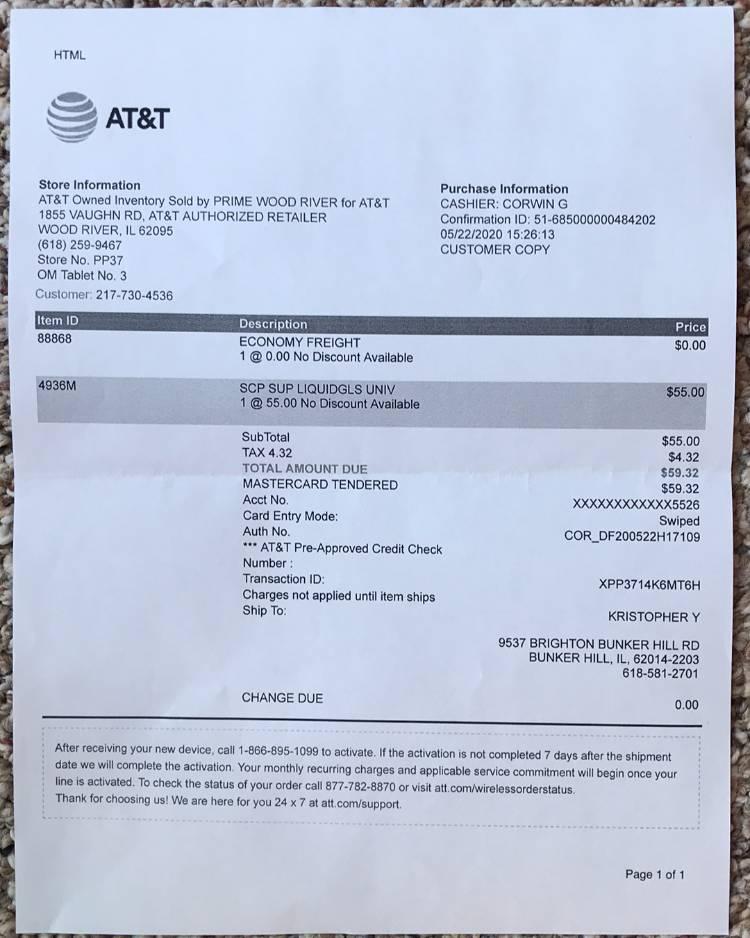

In [17]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()
image_name = list(uploaded.keys())[0]  # get the name of the uploaded image

image = Image.open(io.BytesIO(uploaded[image_name]))
image = image.convert("RGB")
image.show()

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

[4, 3, 3, 7, 7, 2, 8, 2, 1, 10, 13, 1, 3, 3, 8, 1, 8, 8, 8, 3, 10, 9, 1, 1, 8, 3, 1, 10, 13, 10, 3, 3, 8, 8, 11, 8, 2, 8, 3, 3, 1, 1, 1, 3, 1, 1, 12, 1, 2, 3, 1, 1, 2, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 8, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 10, 11, 8, 3, 0, 10, 7, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 1, 1, 11, 3, 11, 8, 3, 0, 10, 10, 2, 11, 8, 7, 1, 11, 3, 2, 8, 3, 2, 3, 2, 3, 10, 2, 3, 3, 11, 3, 2, 3, 1, 7, 7, 3, 1, 3, 2, 1, 1, 3, 8, 3, 7, 1, 3, 2, 2, 7, 1, 3, 7, 2, 1, 3, 3, 1, 3, 7, 1, 2, 1, 1, 11, 1, 8, 3, 3, 13, 8, 3, 3, 7, 7, 11, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 8, 2, 3, 1, 11, 8, 3, 0, 11, 1, 3, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11, 11, 11, 1, 1, 8, 4, 1, 7, 2, 3, 3, 3, 3, 10, 3, 3, 3, 3, 7, 8, 3, 8, 8, 10, 13, 1, 3, 1, 1, 8, 8, 7, 10, 3, 3, 1, 8, 3, 8, 1, 10, 8, 3, 1, 11, 3, 3, 8, 8, 3, 8, 8, 1, 4, 1, 2, 1, 8, 3, 3, 1, 13, 1, 3, 1, 8, 3, 1, 1, 3, 3, 1, 1, 8, 8, 2, 3, 3, 3, 13, 3, 1, 1, 3, 13, 8, 3, 3, 8, 3, 8, 3, 5, 11, 13, 3, 1, 1, 8, 1, 1, 8, 1, 1, 8, 1, 3, 8, 3, 1, 3, 2, 11, 2

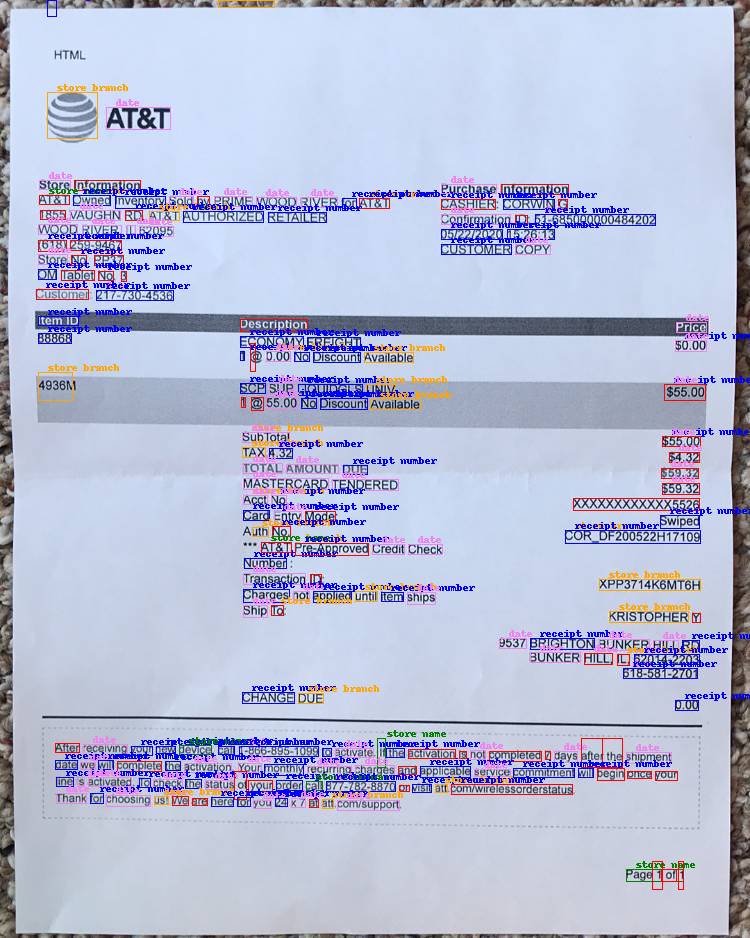

In [18]:
temp_image_path = "temp_image.png"
image.save(temp_image_path)

model_path = '/content/drive/MyDrive/OCR/layoutlm.pt'
model = model_load(model_path, num_labels)
image, words, boxes, actual_boxes = preprocess(temp_image_path)

# Remove the temporary file after processing
os.remove(temp_image_path)

word_level_predictions, final_boxes=convert_to_features(image, words, boxes, actual_boxes, model)

draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
def iob_to_label(label):
  if label != 'O':
    return label[2:]
  else:
    return ""
label2color = {'question':'brown', 'answer':'purple', 'header':'pink', 'other':'yellow','receipt number':'blue', 'store name':'green', 'store branch':'orange', 'date':'violet'}
default_color = "red"  # You can set any default color you prefer

for prediction, box in zip(word_level_predictions, final_boxes):
    predicted_label = iob_to_label(label_map[prediction]).lower()

    if predicted_label not in label2color:
        label2color[predicted_label] = default_color

    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)
image

# Saving Model
